# Nama Anggota 
## 1. Fitriono Arya Riski (1301180387)
## 2. Rakhmat Rifaldy    (1301180407)

In [ ]:
!gdown --id '1qTftp62wgsv6QjBvquZ0SJd2dkGBw5-F'

Downloading...
From: https://drive.google.com/uc?id=1qTftp62wgsv6QjBvquZ0SJd2dkGBw5-F
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 65.2MB/s]


In [ ]:
#!pip install 

In [ ]:
#!pip install numpy scipy scikit-learn pandas joblib pytorch

In [ ]:
#!pip install deap update_checker tqdm stopit xgboost

In [ ]:
#!pip install scikit-mdr skrebate


In [ ]:
!pip install tpot


In [ ]:
#import machine learning pkg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

#Import pkg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score,classification_report,confusion_matrix

# Load Data Preparation

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Eksplorasi Data

##Check Data Duplicate

In [ ]:
df.shape

(145460, 23)

In [ ]:
print("Before Delete Duplicate: ",len(df))
print("After Delete Duplicates: ",len(df.drop_duplicates()))

Before Delete Duplicate:  145460
After Delete Duplicates:  145460


##Check Missing Values

In [ ]:
miss_values = df.isnull().sum()
miss_values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# Menghapus 4 kolom yang memiliki banyak missing values
drop_column = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True, axis=1)
drop_column

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


##Check & Drop Data Null

In [ ]:
# Digunakan fillna untuk mengisi value null
df.fillna(df.mean(), inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# Menghapus data null
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

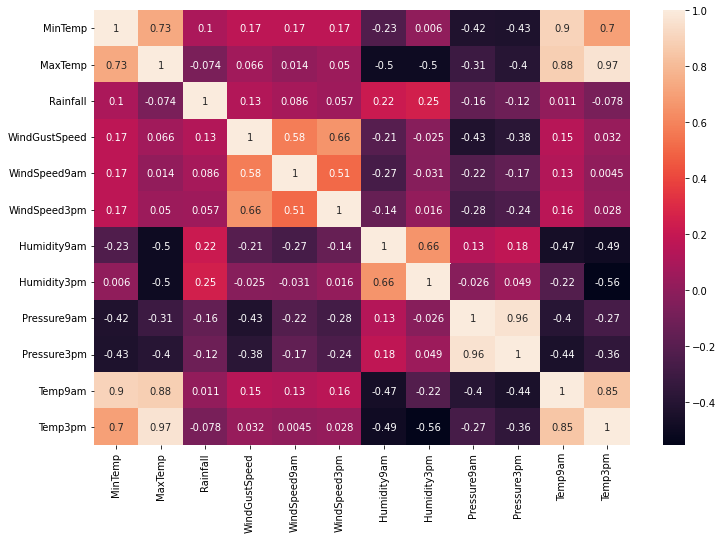

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
##nyoba
df_nyoba = df[['MinTemp','MaxTemp']]

##Check Outlier & Visualisasi

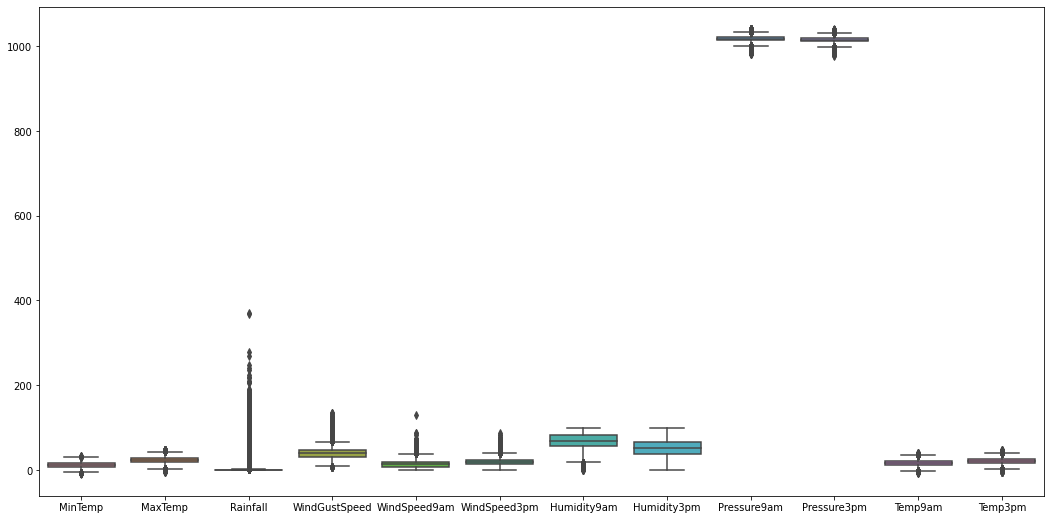

In [ ]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df)

In [ ]:
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include=np.number))
remove_outlier = df[(np.abs(z_scores) < 3).all(axis=1)]
df = remove_outlier

#Reset Index
df.reset_index(drop=True, inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138203,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
138204,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
138205,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
138206,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


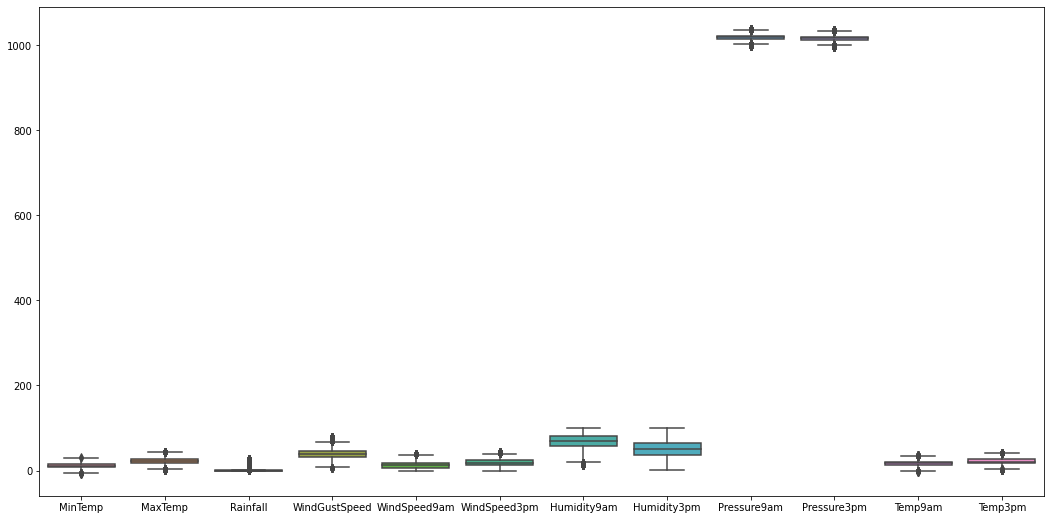

In [ ]:
#Setelah menghilangkan outlier data
plt.figure(figsize=(18,9))
sns.boxplot(data=df)

##Numerical & Categorical

In [ ]:
#Numerical
df.select_dtypes('float64').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
#Categorical
df.select_dtypes('object').columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

# Persiapan Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

#Menghapus kolom date dan location
df.drop(['Date','Location'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,2008
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,2008
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,2008
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,2008
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,2008


In [ ]:
df = df.replace({'RainTomorrow':'Yes','RainToday':'Yes'},1)
df = df.replace({'RainTomorrow':'No','RainToday':'No'},0)

In [ ]:
encode = LabelEncoder()
df['WindGustDir']= encode.fit_transform(df['WindGustDir'])
df['WindDir9am']= encode.fit_transform(df['WindDir9am'])
df['WindDir3pm']= encode.fit_transform(df['WindDir3pm'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,2008
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2008
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,2008
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,2008
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,2008


# Feature Scaling Data

In [ ]:
scaling = MinMaxScaler()
df = pd.DataFrame(scaling.fit_transform(df.values), columns = df.columns)

df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,0.535620,0.492925,0.021898,0.866667,0.527778,0.866667,0.933333,0.512821,0.545455,0.666667,0.212121,0.253102,0.295739,0.497409,0.502439,0.0,0.0,1.000000,0.1
1,0.377309,0.544811,0.000000,0.933333,0.527778,0.400000,1.000000,0.102564,0.500000,0.356322,0.242424,0.325062,0.313283,0.505181,0.563415,0.0,0.0,1.000000,0.1
2,0.522427,0.558962,0.000000,1.000000,0.555556,0.866667,1.000000,0.487179,0.590909,0.287356,0.292929,0.250620,0.335840,0.603627,0.536585,0.0,0.0,1.000000,0.1
3,0.424802,0.613208,0.000000,0.266667,0.250000,0.600000,0.000000,0.282051,0.204545,0.367816,0.151515,0.498759,0.438596,0.528497,0.617073,0.0,0.0,1.000000,0.1
4,0.643799,0.714623,0.036496,0.866667,0.486111,0.066667,0.466667,0.179487,0.454545,0.793103,0.323232,0.330025,0.268170,0.520725,0.695122,0.0,0.0,1.000000,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138203,0.255937,0.504717,0.000000,0.000000,0.347222,0.600000,0.066667,0.333333,0.250000,0.436782,0.232323,0.672457,0.626566,0.321244,0.517073,0.0,0.0,0.454545,1.0
138204,0.277045,0.549528,0.000000,0.400000,0.222222,0.600000,0.200000,0.333333,0.204545,0.494253,0.202020,0.645161,0.596491,0.341969,0.568293,0.0,0.0,0.454545,1.0
138205,0.324538,0.587264,0.000000,0.200000,0.430556,0.600000,0.933333,0.230769,0.204545,0.459770,0.232323,0.583127,0.538847,0.383420,0.607317,0.0,0.0,0.454545,1.0
138206,0.387863,0.589623,0.000000,0.600000,0.305556,0.666667,0.200000,0.333333,0.159091,0.436782,0.232323,0.543424,0.531328,0.450777,0.604878,0.0,0.0,0.454545,1.0


# Split Data

In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

# TPOT

In [ ]:
import time
start_time = time.time()

tpot = TPOTClassifier(generations=5,population_size=50, n_jobs=1, verbosity=2,
                      max_eval_time_mins=2, scoring='accuracy')
tpot.fit(X_train,y_train)

end_time = time.time()


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8517693301160358

Generation 2 - Current best internal CV score: 0.851817543323645

Generation 3 - Current best internal CV score: 0.851817543323645

Generation 4 - Current best internal CV score: 0.8522323940358071

Generation 5 - Current best internal CV score: 0.8525411011440772

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=6, max_features=0.05, min_samples_leaf=6, min_samples_split=6, n_estimators=100, subsample=0.7000000000000001), bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=12, min_samples_split=4, n_estimators=100)


In [ ]:
print((end_time-start_time)/3600)

4.182253363728523


In [ ]:
y_pred = tpot.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
confusion_matrix(y_test, y_pred)

array([[26019,  1457],
       [ 3659,  3417]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     27476
         1.0       0.70      0.48      0.57      7076

    accuracy                           0.85     34552
   macro avg       0.79      0.71      0.74     34552
weighted avg       0.84      0.85      0.84     34552



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


In [ ]:
print('MAE ',mae)
print('ACC ',acc)

MAE  0.1480666821023385
ACC  0.8519333178976615


In [ ]:
print('Durasi proses TPOT classifier %s' % ((end_time - start_time)/3600)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test, y_test))

Durasi proses TPOT classifier 4.182253363728523


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


Best pipeline test accuracy: 0.852


In [ ]:
df_hasil = X_test
df_hasil['actual'] = y_test
df_hasil['predict'] = y_pred
df_hasil

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,Year,actual,predict
104844,0.525066,0.443396,0.043796,0.866667,0.472712,0.533333,0.466667,0.153846,0.204545,0.862069,0.787879,0.506203,0.538847,0.450777,0.439024,1.0,0.454545,0.7,1.0,0.0
112132,0.894459,0.948113,0.000000,0.000000,0.638889,0.533333,0.866667,0.282051,0.250000,0.068966,0.090909,0.300248,0.275689,0.904145,0.970732,0.0,0.000000,0.3,0.0,0.0
86676,0.675462,0.537736,0.927007,0.133333,0.638889,0.000000,0.666667,0.564103,0.454545,0.735632,0.686869,0.508685,0.498747,0.593264,0.539024,1.0,0.272727,0.5,1.0,1.0
16864,0.472296,0.476415,0.000000,0.866667,0.472712,0.800000,0.600000,0.102564,0.424151,0.689655,0.510496,0.499999,0.500148,0.590674,0.499595,0.0,0.727273,0.8,0.0,0.0
45944,0.379947,0.523585,0.000000,0.733333,0.277778,0.733333,0.933333,0.153846,0.340909,0.540230,0.404040,0.238213,0.243108,0.463731,0.502439,0.0,0.000000,0.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36831,0.316623,0.242925,0.000000,0.933333,0.666667,0.200000,0.200000,0.435897,0.590909,0.781609,0.848485,0.387097,0.248120,0.336788,0.239024,0.0,0.454545,0.7,1.0,1.0
20199,0.604222,0.408019,0.087591,0.533333,0.791667,0.533333,0.666667,1.000000,0.250000,0.678161,0.696970,0.704715,0.786967,0.525907,0.400000,1.0,0.363636,1.0,1.0,1.0
18108,0.630607,0.490566,0.029197,0.666667,0.347222,0.666667,0.666667,0.487179,0.431818,0.712644,0.696970,0.471464,0.511278,0.562176,0.500000,0.0,0.909091,0.3,0.0,0.0
14608,0.656992,0.481132,0.014599,0.866667,0.472712,0.266667,0.266667,0.102564,0.204545,0.850575,0.959596,0.499999,0.500148,0.546632,0.429268,0.0,1.000000,0.1,1.0,1.0


In [ ]:
df.to_csv('Dataset_Ekplorasi.csv',index=False, header=True)

In [ ]:
df_hasil.to_csv('Dataset_Hasil_TPOT.csv',index= False, header=True)